# Dealing with List Values in a Pandas Dataframe

This notebook serves as supplementary material [this Medium article](https://medium.com/towards-data-science/dealing-with-list-values-in-pandas-dataframes-a177e534f173). I will show you a few techniques that will enable you to deal with list values in pandas effectively.

## 0. Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_csv("fruits.csv", delimiter = ";")

In [3]:
fruits

,name,age,favorite_fruits
0,tammy,6,"[""banana"", ""mango"", ""orange"", ""watermelon""]"
1,bonny,8,"[""apple"", ""pear"", ""peach""]"
2,helga,8,[]
3,tom,10,"[""banana"", ""maracuja"", ""watermelon"", ""apple"", ..."
4,jerome,7,"[""strawberry"", ""raspberry"", ""blueberry""]"
5,hans,9,"[""blueberry"", ""watermelon"", ""apple"", ""raspberry""]"
6,lisa,10,"[""mango"", ""pineapple"", ""orange""]"
7,trish,6,"[""watermelon"", ""apple"", ""blueberry"", ""pear"", ""..."
8,steve,8,"[""pear"", ""strawberry"", ""raspberry""]"
9,antoine,5,"[""peach"", ""strawberry"", ""apple"", ""blueberry""]"


This dataset is fictional. However, I tried to make it look a bit like a real life scenario. This way, I can hopefully help you solve the problems you would encounter in such a scenario.

## Fictional Research Question

* Which fruit occurs the most/the least?
* Which tags are the most strongly correlated?

## The Basic Problem

The main problem with lists in pandas is, that most of pandas' integrated functions aren't compatible with them. Pandas stores every value in a column as one data type. For strings, integers, floats, or datetime values, this doesn't pose a problem. Let's say we want to analyze the age of the sample.

Let's use the value_counts function, which counts, how many times each value of a series occurs in the dataframe.

In [4]:
fruits["age"].value_counts()

8     3
6     2
10    2
7     1
9     1
5     1
Name: age, dtype: int64

If we tried to do this with the list values, we would get really bad results.

In [5]:
fruits["favorite_fruits"].value_counts()

["banana", "mango", "orange", "watermelon"]                   1
["apple", "pear", "peach"]                                    1
[]                                                            1
["banana", "maracuja", "watermelon", "apple", "pineapple"]    1
["strawberry", "raspberry", "blueberry"]                      1
["blueberry", "watermelon", "apple", "raspberry"]             1
["mango", "pineapple", "orange"]                              1
["watermelon", "apple", "blueberry", "pear", "strawberry"]    1
["pear", "strawberry", "raspberry"]                           1
["peach", "strawberry", "apple", "blueberry"]                 1
Name: favorite_fruits, dtype: int64

As you can see, pandas treats every single list item as a single string and is unable to work with the individual components of these strings.

To answer the research questions, we'll need to fix this. In the following, I will present some of the typical issues you'll face and how to solve them efficiently.

## Problem 1. Lists are stored as strings

### Case 1

In our dataframe, each list of fruits is registered as a string object.

In [6]:
for i, l in enumerate(fruits["favorite_fruits"]):
    print("list",i,"is",type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>


There is an easy way to fix this using the apply method.

In [7]:
fruits["favorite_fruits"] = fruits["favorite_fruits"].apply(eval)

In [8]:
for i, l in enumerate(fruits["favorite_fruits"]):
    print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>


Note that pandas will still categorize the series as the object datatype ("O"), which is typicall used for strings. This is'nt a problem, but might confuse you at first glance.

In [9]:
fruits["favorite_fruits"].dtype

dtype('O')

In [10]:
fruits

,name,age,favorite_fruits
0,tammy,6,"[banana, mango, orange, watermelon]"
1,bonny,8,"[apple, pear, peach]"
2,helga,8,[]
3,tom,10,"[banana, maracuja, watermelon, apple, pineapple]"
4,jerome,7,"[strawberry, raspberry, blueberry]"
5,hans,9,"[blueberry, watermelon, apple, raspberry]"
6,lisa,10,"[mango, pineapple, orange]"
7,trish,6,"[watermelon, apple, blueberry, pear, strawberry]"
8,steve,8,"[pear, strawberry, raspberry]"
9,antoine,5,"[peach, strawberry, apple, blueberry]"


### Case 2

If our list looked like this, things would be a bit more complicated:

In [11]:
alt_list = '[item1, item2, item3]'

We can't use eval here, because the items are not stored as strings using " ". If we remove the outer ' ', python will try to deal with the items as variables. And since they are not assigned any value, python will return an error.

I won't go in depth on how to solve this special problem, but for those who have the issue, the function below can solve it.

In [13]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [14]:
clean_alt_list(alt_list)

'["item1","item2","item3"]'

Now, we would be able to clean the entire series using df[col].apply(clean_alt_list).

__OKAY__, so we solved the string type issue. Great! However, there is still more to do.

## Problem 2. How to get unqiue values and value counts?

We have converted the lists from string to list objects. However, using value_counts still doesn't give us any better results.

In [15]:
fruits["favorite_fruits"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[banana, mango, orange, watermelon]                 1
[apple, pear, peach]                                1
[]                                                  1
[banana, maracuja, watermelon, apple, pineapple]    1
[strawberry, raspberry, blueberry]                  1
[blueberry, watermelon, apple, raspberry]           1
[mango, pineapple, orange]                          1
[watermelon, apple, blueberry, pear, strawberry]    1
[pear, strawberry, raspberry]                       1
[peach, strawberry, apple, blueberry]               1
Name: favorite_fruits, dtype: int64

Instead, we can use this simple method to get our value counts in just one line of code.

First, we apply the magic.

In [17]:
fruits["favorite_fruits"].explode()

0         banana
1          mango
2         orange
3     watermelon
4          apple
5           pear
6          peach
7         banana
8       maracuja
9     watermelon
10         apple
11     pineapple
12    strawberry
13     raspberry
14     blueberry
15     blueberry
16    watermelon
17         apple
18     raspberry
19         mango
20     pineapple
21        orange
22    watermelon
23         apple
24     blueberry
25          pear
26    strawberry
27          pear
28    strawberry
29     raspberry
30         peach
31    strawberry
32         apple
33     blueberry
dtype: object

Now, we can chain value_counts() onto that.

In [18]:
fruits["favorite_fruits"].explode().value_counts()

apple         5
watermelon    4
strawberry    4
blueberry     4
pear          3
raspberry     3
banana        2
mango         2
orange        2
peach         2
pineapple     2
maracuja      1
dtype: int64

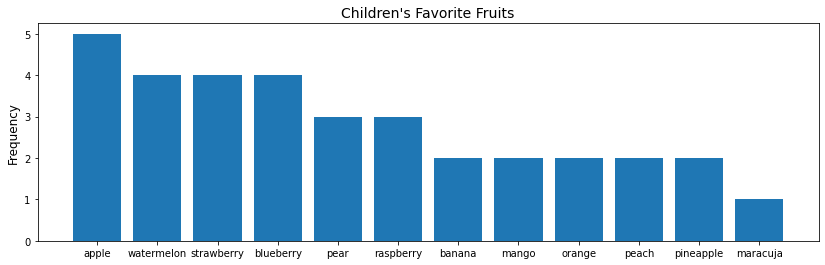

In [19]:
# Get unique items & counts
unique_values = fruits["favorite_fruits"].explode().value_counts().index.tolist()
unique_value_counts = fruits["favorite_fruits"].explode().value_counts().values

# Create plot
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(unique_values, unique_value_counts)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Children's Favorite Fruits", size = 14)

plt.savefig("bar_viz.jpg", dpi = 300)

Alternatively, we could get all unique values using the unique function.

In [21]:
fruits["favorite_fruits"].explode().unique()

array(['banana', 'mango', 'orange', 'watermelon', 'apple', 'pear',
       'peach', 'maracuja', 'pineapple', 'strawberry', 'raspberry',
       'blueberry'], dtype=object)

__OKAY__, with this, we can answer research question one: apples were named the most and maracujas the least.

## Problem 3. What if I want to have a column for every list item?

There are two ways to do this. One is very simple and the other is rather complex and time consuming. However, you will need to choose between the two depending on the task you want to accomplish.

__Method 1__

This is a shockingly easy and fast method I stumbled upon. And it's so useful!

In [22]:
fruits

,name,age,favorite_fruits
0,tammy,6,"[banana, mango, orange, watermelon]"
1,bonny,8,"[apple, pear, peach]"
2,helga,8,[]
3,tom,10,"[banana, maracuja, watermelon, apple, pineapple]"
4,jerome,7,"[strawberry, raspberry, blueberry]"
5,hans,9,"[blueberry, watermelon, apple, raspberry]"
6,lisa,10,"[mango, pineapple, orange]"
7,trish,6,"[watermelon, apple, blueberry, pear, strawberry]"
8,steve,8,"[pear, strawberry, raspberry]"
9,antoine,5,"[peach, strawberry, apple, blueberry]"


In [23]:
fruits_expanded_v1 = fruits["favorite_fruits"].apply(pd.Series)

In [24]:
fruits_expanded_v1

,0,1,2,3,4
0,banana,mango,orange,watermelon,NaN
1,apple,pear,peach,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,banana,maracuja,watermelon,apple,pineapple
4,strawberry,raspberry,blueberry,NaN,NaN
5,blueberry,watermelon,apple,raspberry,NaN
6,mango,pineapple,orange,NaN,NaN
7,watermelon,apple,blueberry,pear,strawberry
8,pear,strawberry,raspberry,NaN,NaN
9,peach,strawberry,apple,blueberry,NaN


With this, we can easily count how many times a certain fruit has been named as the number 1 or number 2 favorite fruit, for example.

In [25]:
def get_rankings(item, df = fruits_expanded_v1):
    
    # Empty dict for results
    item_count_dict = {}
    
    # For every tag in df
    for i in range(df.shape[1]):
        
        # Calculate % of cases that tagged the item
        val_counts = df.iloc[:,i].value_counts(normalize = True)
        if item in val_counts.index:
            item_counts = val_counts[item]
        else:
            item_counts = 0
        
        # Add score to dict
        item_count_dict["tag_{}".format(i)] = item_counts
    
    return item_count_dict

In [26]:
fruits_expanded_v1.iloc[:,0].value_counts(normalize = True)

banana        0.222222
apple         0.111111
strawberry    0.111111
blueberry     0.111111
mango         0.111111
watermelon    0.111111
pear          0.111111
peach         0.111111
Name: 0, dtype: float64

In [27]:
get_rankings(item = "apple")

{'tag_0': 0.1111111111111111,
 'tag_1': 0.1111111111111111,
 'tag_2': 0.2222222222222222,
 'tag_3': 0.2,
 'tag_4': 0}

Another use case would be to apply different weights to the items, depending on whether they were tagged first , second, or third.

__Method 2__

This one relies on looping. For large datasets, this procedure will be very slow.

For this method, we need to get a list of __all__ unique items.

This isn't as easy as it may seem at first glance. The easiest way is to append every list of items onto each other and then reduce the dimensions back to 1. After that, we can chain a value_counts() right next to it to get all unique items. This is also the fastest way to figure out which items are the most/least frequent in the dataset.

In [29]:
unique_items = fruits["favorite_fruits"].explode().value_counts()

In [30]:
unique_items

apple         5
watermelon    4
strawberry    4
blueberry     4
pear          3
raspberry     3
banana        2
mango         2
orange        2
peach         2
pineapple     2
maracuja      1
dtype: int64

In [31]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [32]:
fruits_bool = boolean_df(fruits["favorite_fruits"], unique_items.keys())

In [33]:
fruits_bool

,apple,watermelon,strawberry,blueberry,pear,raspberry,banana,mango,orange,peach,pineapple,maracuja
0,False,True,False,False,False,False,True,True,True,False,False,False
1,True,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,True,False,False,False,True,True
4,False,False,True,True,False,True,False,False,False,False,False,False
5,True,True,False,True,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,True,False,True,False
7,True,True,True,True,True,False,False,False,False,False,False,False
8,False,False,True,False,True,True,False,False,False,False,False,False
9,True,False,True,True,False,False,False,False,False,True,False,False


As you can see, the dataframe signals whether an item is in an itemlist. At first glance, this doesn't look very intuitive. Let me show you how useful it can be.

With one line of code, we can correlate the items.

In [34]:
fruits_corr = fruits_bool.corr() # no need to specify the method, as pearson and spearman will return the same results.

In [35]:
fruits_corr

,apple,watermelon,strawberry,blueberry,pear,raspberry,banana,mango,orange,peach,pineapple,maracuja
apple,1.000000e+00,0.408248,-2.266233e-17,0.408248,0.218218,-0.218218,0.000000,-0.500000,-0.500000,0.500000,0.000000,0.333333
watermelon,4.082483e-01,1.000000,-2.500000e-01,0.166667,-0.089087,-0.089087,0.612372,0.102062,0.102062,-0.408248,0.102062,0.408248
strawberry,-2.266233e-17,-0.250000,1.000000e+00,0.583333,0.356348,0.356348,-0.408248,-0.408248,-0.408248,0.102062,-0.408248,-0.272166
blueberry,4.082483e-01,0.166667,5.833333e-01,1.000000,-0.089087,0.356348,-0.408248,-0.408248,-0.408248,0.102062,-0.408248,-0.272166
pear,2.182179e-01,-0.089087,3.563483e-01,-0.089087,1.000000,0.047619,-0.327327,-0.327327,-0.327327,0.218218,-0.327327,-0.218218
raspberry,-2.182179e-01,-0.089087,3.563483e-01,0.356348,0.047619,1.000000,-0.327327,-0.327327,-0.327327,-0.327327,-0.327327,-0.218218
banana,0.000000e+00,0.612372,-4.082483e-01,-0.408248,-0.327327,-0.327327,1.000000,0.375000,0.375000,-0.250000,0.375000,0.666667
mango,-5.000000e-01,0.102062,-4.082483e-01,-0.408248,-0.327327,-0.327327,0.375000,1.000000,1.000000,-0.250000,0.375000,-0.166667
orange,-5.000000e-01,0.102062,-4.082483e-01,-0.408248,-0.327327,-0.327327,0.375000,1.000000,1.000000,-0.250000,0.375000,-0.166667
peach,5.000000e-01,-0.408248,1.020621e-01,0.102062,0.218218,-0.327327,-0.250000,-0.250000,-0.250000,1.000000,-0.250000,-0.166667


This is very useful! We can answer questions like: If a kid likes bananas, what kind of fruit is it propably going to like, too?

In [36]:
fruits_corr["banana"].sort_values(ascending = False)

banana        1.000000
maracuja      0.666667
watermelon    0.612372
mango         0.375000
orange        0.375000
pineapple     0.375000
apple         0.000000
peach        -0.250000
pear         -0.327327
raspberry    -0.327327
strawberry   -0.408248
blueberry    -0.408248
Name: banana, dtype: float64

We can tell that maracuja is the fruit that is most commonly liked by kids who like bananas.

Another useful thing to do is to count how many times an item co-occurs with the other items. This can easily be done using vectorized matrix multiplication. For that, we'll need to convert the boolean values to integers.

In [37]:
fruits_int = fruits_bool.astype(int)
fruits_int.head(10)

,apple,watermelon,strawberry,blueberry,pear,raspberry,banana,mango,orange,peach,pineapple,maracuja
0,0,1,0,0,0,0,1,1,1,0,0,0
1,1,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,1,1
4,0,0,1,1,0,1,0,0,0,0,0,0
5,1,1,0,1,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,0,1,0
7,1,1,1,1,1,0,0,0,0,0,0,0
8,0,0,1,0,1,1,0,0,0,0,0,0
9,1,0,1,1,0,0,0,0,0,1,0,0


In [38]:
fruits_freq_mat = np.dot(fruits_int.T, fruits_int)

In [39]:
fruits_freq_mat

array([[5, 3, 2, 3, 2, 1, 1, 0, 0, 2, 1, 1],
       [3, 4, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1],
       [2, 1, 4, 3, 2, 2, 0, 0, 0, 1, 0, 0],
       [3, 2, 3, 4, 1, 2, 0, 0, 0, 1, 0, 0],
       [2, 1, 2, 1, 3, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 2, 2, 1, 3, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0],
       [2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]])

This can easily be converted back to a dataframe.

In [40]:
fruits_freq = pd.DataFrame(fruits_freq_mat, columns = unique_items.keys(), index = unique_items.keys())

In [41]:
fruits_freq

,apple,watermelon,strawberry,blueberry,pear,raspberry,banana,mango,orange,peach,pineapple,maracuja
apple,5,3,2,3,2,1,1,0,0,2,1,1
watermelon,3,4,1,2,1,1,2,1,1,0,1,1
strawberry,2,1,4,3,2,2,0,0,0,1,0,0
blueberry,3,2,3,4,1,2,0,0,0,1,0,0
pear,2,1,2,1,3,1,0,0,0,1,0,0
raspberry,1,1,2,2,1,3,0,0,0,0,0,0
banana,1,2,0,0,0,0,2,1,1,0,1,1
mango,0,1,0,0,0,0,1,2,2,0,1,0
orange,0,1,0,0,0,0,1,2,2,0,1,0
peach,2,0,1,1,1,0,0,0,0,2,0,0


We can also visualize this using a heatmap, for example.

In [42]:
import seaborn as sn

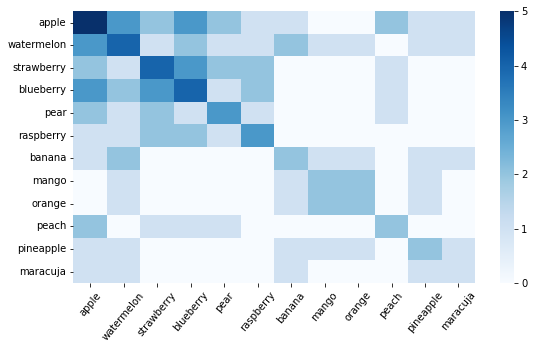

In [43]:
fig, ax = plt.subplots(figsize = (9,5))
sn.heatmap(fruits_freq, cmap = "Blues")
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)


_____________________________________________________________

__I hope this was helpful for you. Thanks for reading!__